In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import spacy
import nltk
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import itertools
sns.set()
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [2]:
data_raw = pd.read_csv(r'D:\z Data Science\Assignment\Assignment\Assignment 16\Elon_musk.csv')
data_raw

,Unnamed: 0,Text
0,1,@kunalb11 I�m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [3]:
data = [i.strip() for i in data_raw['Text']]
data = [i for i in data if i]
data[0:5]

['@kunalb11 I�m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!']

In [4]:
nlp = spacy.load('en_core_web_sm')

doc_block = nlp(''.join(data))
spacy.displacy.render(doc_block[0:5], style = 'ent', jupyter = True)

C:\Users\akshp\anaconda3\lib\site-packages\spacy\displacy\__init__.py:189: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


In [5]:
for token in doc_block[0:5]:
    print(token, token.pos_)

@kunalb11 PROPN
I PRON
� PROPN
m VERB
an DET


In [6]:
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
nouns_verbs[0:5]


['m', 'alien@ID_AA_Carmack', 'Ray', 'tracing', 'is']

In [7]:
cv = CountVectorizer()
X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis = 0)
word_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
wf_df = pd.DataFrame(word_freq, columns = ['Word', 'Count'])
wf_df = wf_df.sort_values(by ='Count', ascending = False)
wf_df = wf_df.reset_index(drop = True)
wf_df

,Word,Count
0,amp,216
1,co,206
2,https,196
3,spacex,177
4,be,128
...,...,...
2995,saliva,1
2996,robintosh_nunez,1
2997,fist,1
2998,playingshakes,1


<AxesSubplot:xlabel='Word', ylabel='Count'>

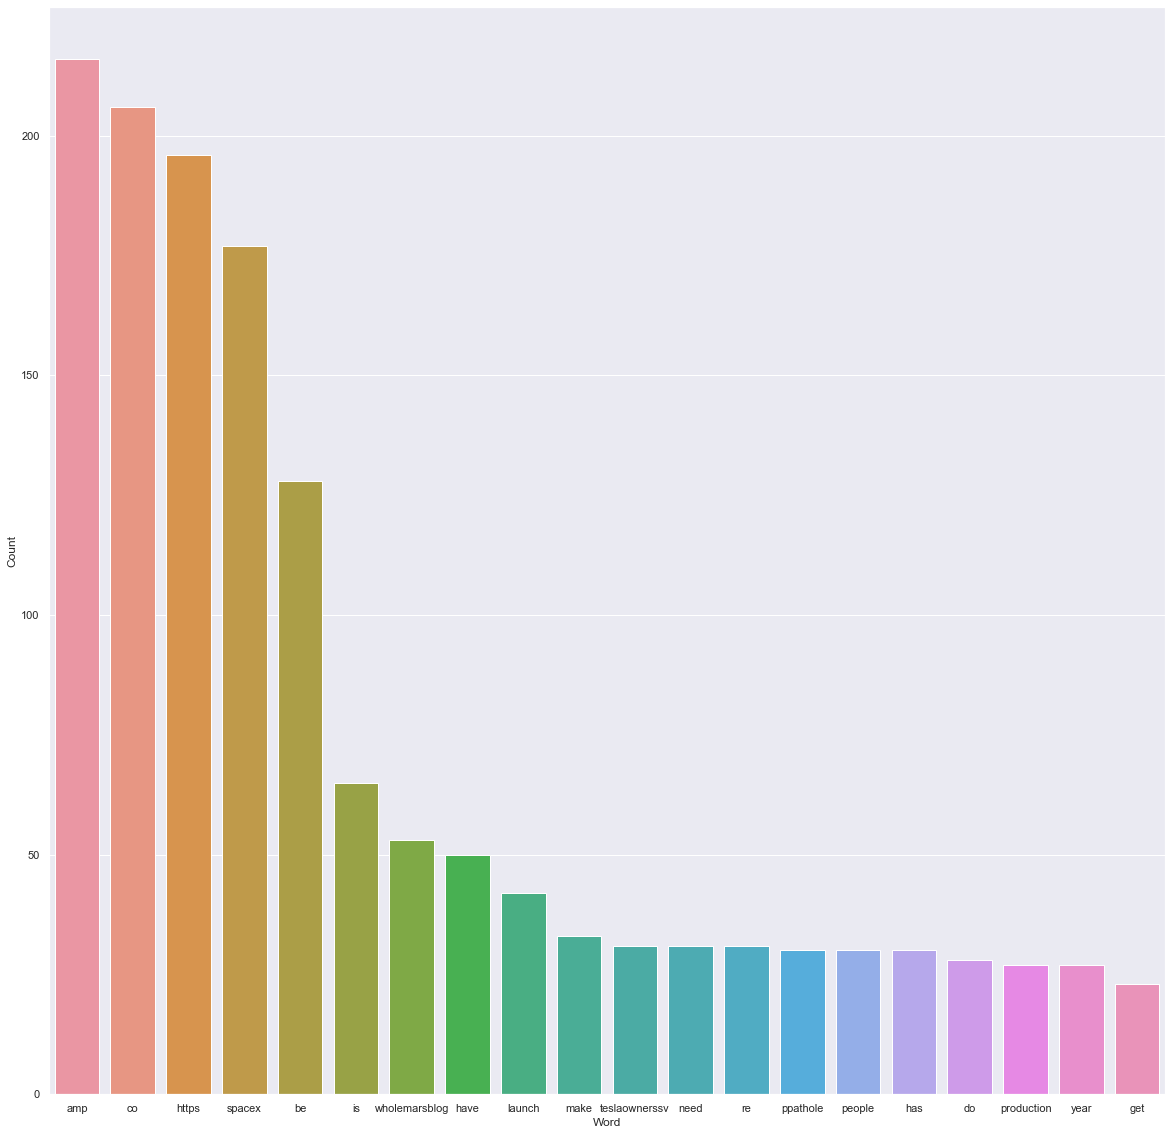

In [8]:
plt.figure(figsize = (20,20))
sns.barplot(x = wf_df['Word'][0:20], y = wf_df['Count'][0:20])

In [9]:
afinn = pd.read_csv(r'C:\Users\akshp\Downloads\Programs\archive\Afinn.csv', sep = ',', encoding = 'latin-1')
afinn.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [10]:
affinity_scores = afinn.set_index('word')['value'].to_dict()
list(itertools.islice(affinity_scores.items(), 20))

[('abandon', -2),
 ('abandoned', -2),
 ('abandons', -2),
 ('abducted', -2),
 ('abduction', -2),
 ('abductions', -2),
 ('abhor', -3),
 ('abhorred', -3),
 ('abhorrent', -3),
 ('abhors', -3),
 ('abilities', 2),
 ('ability', 2),
 ('aboard', 1),
 ('absentee', -1),
 ('absentees', -1),
 ('absolve', 2),
 ('absolved', 2),
 ('absolves', 2),
 ('absolving', 2),
 ('absorbed', 1)]

In [11]:
sentences = nltk.tokenize.sent_tokenize(' '.join(data))
sentence_df = pd.DataFrame(sentences, columns = ['Sentence'])
sentence_df

,Sentence
0,@kunalb11 I�m an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
909,"@kenyanwalstreet Not actually a payout, just a..."
910,"It may never pay out, as the stock can�t b� ht..."
911,Details Aug 28.
912,AI symbiosis while u wait @vistacruiser7 @flcn...


In [12]:
sentiment_lexicon = affinity_scores

def calculate_sentiment(text):
    sentiment_score = 0
    if type(text) == str:
        sentence = nlp(text)
        for word in sentence:
            sentiment_score += sentiment_lexicon.get(word.lemma_,0)
    return sentiment_score

In [13]:
sentence_df['Sentiment_value'] = sentence_df['Sentence'].apply(calculate_sentiment)
sentence_df['Sentence_length'] = sentence_df['Sentence'].str.split().apply(len)
sentence_df

,Sentence,Sentiment_value,Sentence_length
0,@kunalb11 I�m an alien @ID_AA_Carmack Ray trac...,0,13
1,Have you tried it?,0,4
2,@joerogan @Spotify Great interview!,3,4
3,@gtera27 Doge is underestimated @teslacn Congr...,3,13
4,Now on to the next for even more!!,0,8
...,...,...,...
909,"@kenyanwalstreet Not actually a payout, just a...",0,11
910,"It may never pay out, as the stock can�t b� ht...",-4,31
911,Details Aug 28.,0,3
912,AI symbiosis while u wait @vistacruiser7 @flcn...,-2,47


In [14]:
sentence_df.describe()

,Sentiment_value,Sentence_length
count,914.000000,914.000000
mean,1.376368,23.141138
std,2.693656,24.511141
min,-8.000000,1.000000
25%,0.000000,7.000000
50%,0.000000,14.000000
75%,3.000000,31.000000
max,16.000000,231.000000


C:\Users\akshp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sentiment_value', ylabel='Density'>

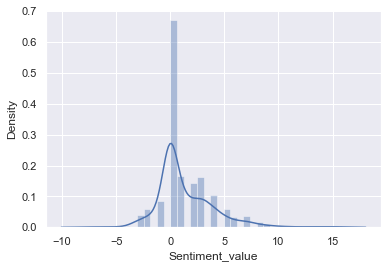

In [15]:
sns.distplot(sentence_df['Sentiment_value'])

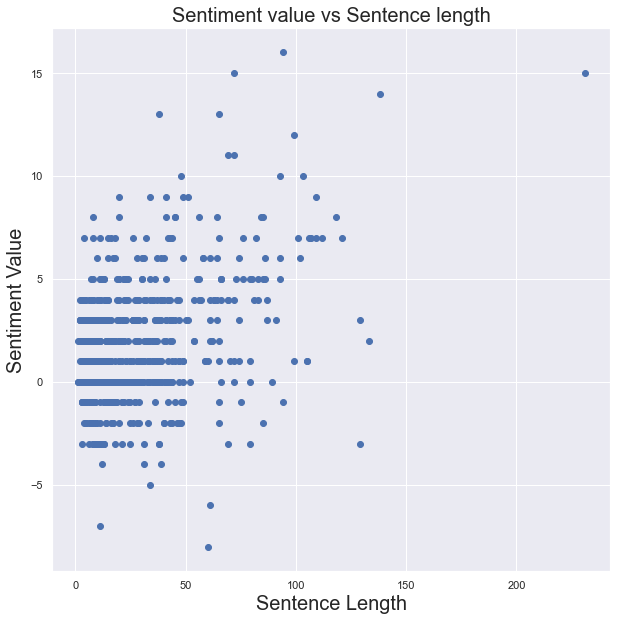

In [16]:
plt.figure(figsize = (10,10))
plt.scatter(sentence_df['Sentence_length'], sentence_df['Sentiment_value'])
plt.title('Sentiment value vs Sentence length', fontsize = 20)
plt.xlabel('Sentence Length', fontsize = 20)
plt.ylabel('Sentiment Value', fontsize = 20)
plt.show()

# Emotion Mining

In [17]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import requests as rq
from wordcloud import WordCloud

sns.set(color_codes=True)

%matplotlib inline

In [18]:
data = pd.read_csv(r"D:\z Data Science\Assignment\Assignment\Assignment 16\Reviews-9-products\Nokia 6600.txt",error_bad_lines=False)
data

b'Skipping line 8: expected 1 fields, saw 4\nSkipping line 9: expected 1 fields, saw 2\nSkipping line 12: expected 1 fields, saw 2\nSkipping line 16: expected 1 fields, saw 3\nSkipping line 17: expected 1 fields, saw 2\nSkipping line 28: expected 1 fields, saw 2\nSkipping line 34: expected 1 fields, saw 3\nSkipping line 36: expected 1 fields, saw 2\nSkipping line 42: expected 1 fields, saw 2\nSkipping line 47: expected 1 fields, saw 2\nSkipping line 51: expected 1 fields, saw 2\nSkipping line 54: expected 1 fields, saw 2\nSkipping line 59: expected 1 fields, saw 2\nSkipping line 60: expected 1 fields, saw 3\nSkipping line 65: expected 1 fields, saw 2\nSkipping line 66: expected 1 fields, saw 2\nSkipping line 67: expected 1 fields, saw 2\nSkipping line 68: expected 1 fields, saw 4\nSkipping line 69: expected 1 fields, saw 2\nSkipping line 70: expected 1 fields, saw 2\nSkipping line 72: expected 1 fields, saw 2\nSkipping line 74: expected 1 fields, saw 2\nSkipping line 75: expected 1 fie

,[t]
0,phone[+3][u]##I've had this beauty for nearly ...
1,battery life[-2]##The only disappointment so f...
2,battery life[-2][u]##Mine generally requires a...
3,##Why is this phone so great?
4,##Simple.
...,...
315,##I'll have to buy bigger MMC card of course.
316,phone[+3]##I love this phone.
317,[t]
318,phone[+3]##This phone is one of the milestones...


In [19]:
data.rename(columns={'[t]': 'x'}, inplace=True)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x       320 non-null    object
dtypes: object(1)
memory usage: 2.6+ KB


In [21]:
data = [x.strip() for x in data.x] # remove both the leading and the trailing characters
data = [x for x in data if x] # removes empty strings, because they are considered in Python as False
data[0:10]

["phone[+3][u]##I've had this beauty for nearly 2 months now and I truely love it.",
 'battery life[-2]##The only disappointment so far has been battery life.',
 "battery life[-2][u]##Mine generally requires a charege every 48 hours or so and I don't really talk on it that much.",
 '##Why is this phone so great?',
 '##Simple.',
 'phone[+3][p]##It has it all.',
 '[t]',
 '##I got this with the need for a nokia GSM camera-phone with speakerphone.',
 '6600[+3]##6600 looks and feels nice.',
 'bluetooth[+3]##This one is full of features(has bluetooth).']

In [22]:
# Joining the list into one string/text
text = ' '.join(data)
text

'phone[+3][u]##I\'ve had this beauty for nearly 2 months now and I truely love it. battery life[-2]##The only disappointment so far has been battery life. battery life[-2][u]##Mine generally requires a charege every 48 hours or so and I don\'t really talk on it that much. ##Why is this phone so great? ##Simple. phone[+3][p]##It has it all. [t] ##I got this with the need for a nokia GSM camera-phone with speakerphone. 6600[+3]##6600 looks and feels nice. bluetooth[+3]##This one is full of features(has bluetooth). LCD[+3]camera quality[+3]##Especially the LCD is big and the camera quality is among the very best around. battery life[+3][u]##Goes ~3 days after a charge. [t] ##Its been 11 months now that I\'ve held on to my Nokia 6600 for. phone[-1][cs]##I purchased this phone knowing it was slightly old as compared to the newer models of Nokia phones available. priced[-2]##I thought it was kind of steeply priced at that time. phone[+3]##I must add to the dismay/delight of readers this phon

In [23]:
#Punctuation
no_punc_text = text.translate(str.maketrans('', '', string.punctuation)) #with arguments (x, y, z) where 'x' and 'y'
# must be equal-length strings and characters in 'x'
# are replaced by characters in 'y'. 'z'
# is a string (string.punctuation here)
no_punc_text

'phone3uIve had this beauty for nearly 2 months now and I truely love it battery life2The only disappointment so far has been battery life battery life2uMine generally requires a charege every 48 hours or so and I dont really talk on it that much Why is this phone so great Simple phone3pIt has it all t I got this with the need for a nokia GSM cameraphone with speakerphone 660036600 looks and feels nice bluetooth3This one is full of featureshas bluetooth LCD3camera quality3Especially the LCD is big and the camera quality is among the very best around battery life3uGoes 3 days after a charge t Its been 11 months now that Ive held on to my Nokia 6600 for phone1csI purchased this phone knowing it was slightly old as compared to the newer models of Nokia phones available priced2I thought it was kind of steeply priced at that time phone3I must add to the dismaydelight of readers this phone is simply the most groundbreaking phone mankind has ever held use3It has raised the bar owing to number

In [24]:
#Tokenization
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
print(text_tokens[0:50])

['phone3uIve', 'had', 'this', 'beauty', 'for', 'nearly', '2', 'months', 'now', 'and', 'I', 'truely', 'love', 'it', 'battery', 'life2The', 'only', 'disappointment', 'so', 'far', 'has', 'been', 'battery', 'life', 'battery', 'life2uMine', 'generally', 'requires', 'a', 'charege', 'every', '48', 'hours', 'or', 'so', 'and', 'I', 'dont', 'really', 'talk', 'on', 'it', 'that', 'much', 'Why', 'is', 'this', 'phone', 'so', 'great']


In [25]:
len(text_tokens)

3452

In [26]:
#Remove stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

my_stop_words = stopwords.words('english')
my_stop_words.append('the')
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:40])

['phone3uIve', 'beauty', 'nearly', '2', 'months', 'I', 'truely', 'love', 'battery', 'life2The', 'disappointment', 'far', 'battery', 'life', 'battery', 'life2uMine', 'generally', 'requires', 'charege', 'every', '48', 'hours', 'I', 'dont', 'really', 'talk', 'much', 'Why', 'phone', 'great', 'Simple', 'phone3pIt', 'I', 'got', 'need', 'nokia', 'GSM', 'cameraphone', 'speakerphone', '660036600']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\akshp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\akshp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
#Noramalize the data
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:25])

['phone3uive', 'beauty', 'nearly', '2', 'months', 'i', 'truely', 'love', 'battery', 'life2the', 'disappointment', 'far', 'battery', 'life', 'battery', 'life2umine', 'generally', 'requires', 'charege', 'every', '48', 'hours', 'i', 'dont', 'really']


In [28]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40])

['phone3u', 'beauti', 'nearli', '2', 'month', 'i', 'trueli', 'love', 'batteri', 'life2th', 'disappoint', 'far', 'batteri', 'life', 'batteri', 'life2umin', 'gener', 'requir', 'chareg', 'everi', '48', 'hour', 'i', 'dont', 'realli', 'talk', 'much', 'whi', 'phone', 'great', 'simpl', 'phone3pit', 'i', 'got', 'need', 'nokia', 'gsm', 'cameraphon', 'speakerphon', '660036600']


In [29]:
# NLP english language model of spacy library
nlp = spacy.load('en_core_web_sm') 

In [30]:
# lemmas being one of them, but mostly POS, which will follow later
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:40])

phone3uIve beauty nearly 2 months I truely love battery life2The disappointment far battery life battery life2uMine generally requires charege every 48 hours I dont really talk much Why phone great Simple phone3pIt I got need nokia GSM cameraphone speakerphone


In [31]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25])

['phone3uive', 'beauty', 'nearly', '2', 'month', 'I', 'truely', 'love', 'battery', 'life2the', 'disappointment', 'far', 'battery', 'life', 'battery', 'life2umine', 'generally', 'require', 'charege', 'every', '48', 'hour', 'I', 'do', 'nt']


In [32]:
#feature extraction


In [33]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)

In [34]:
print(vectorizer.vocabulary_)

{'phone3uive': 639, 'beauty': 92, 'nearly': 553, 'month': 538, 'truely': 888, 'love': 493, 'battery': 87, 'life2the': 462, 'disappointment': 235, 'far': 293, 'life': 459, 'life2umine': 463, 'generally': 338, 'require': 722, 'charege': 167, 'every': 276, '48': 15, 'hour': 376, 'do': 243, 'nt': 571, 'really': 693, 'talk': 844, 'much': 546, 'why': 939, 'phone': 617, 'great': 350, 'simple': 780, 'phone3pit': 633, 'get': 339, 'need': 555, 'nokia': 562, 'gsm': 354, 'cameraphone': 148, 'speakerphone': 803, '660036600': 19, 'look': 485, 'feel': 302, 'nice': 561, 'bluetooth3this': 109, 'one': 583, 'full': 324, 'featureshas': 300, 'bluetooth': 100, 'lcd3camera': 447, 'quality3especially': 678, 'lcd': 446, 'big': 96, 'camera': 142, 'quality': 675, 'among': 53, 'good': 345, 'around': 70, 'life3ugoe': 466, 'day': 216, 'charge': 168, 'its': 414, '11': 2, 've': 913, 'hold': 374, '6600': 18, 'phone1csi': 618, 'purchase': 672, 'know': 439, 'slightly': 788, 'old': 580, 'compare': 184, 'new': 559, 'model

In [35]:
print(vectorizer.get_feature_names()[50:100])
print(X.toarray()[50:100])

['also', 'amazon', 'american', 'among', 'andor', 'animation', 'annoy', 'another', 'answer', 'anything', 'anyway', 'anyways', 'apart', 'apparently', 'apple', 'application', 'applications2application', 'apporve', 'arbitrary', 'area', 'around', 'assign', 'atleast', 'att', 'audio', 'audiunderstate', 'available', 'awesome', 'awfully', 'baby', 'back', 'backup', 'bad', 'band', 'band33', 'bar', 'basic', 'battery', 'battery2the', 'battery2with', 'be', 'beautiful', 'beauty', 'benzobvious', 'bet', 'beware', 'big', 'bill', 'bit', 'blend']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [36]:
print(X.toarray().shape)

(2065, 956)


In [37]:
# bigrams and trigrams

In [38]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(data)

In [39]:
print(vectorizer_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['6600', 'about', 'all', 'an', 'and', 'and the', 'any', 'are', 'as', 'at', 'battery', 'battery life', 'be', 'best', 'bluetooth', 'but', 'by', 'calls', 'camera', 'can', 'card', 'cc', 'do', 'does', 'feature', 'features', 'for', 'for the', 'from', 'games', 'get', 'good', 'great', 'had', 'has', 'have', 'if', 'in', 'in the', 'interface', 'is', 'is the', 'it', 'its', 'life', 'look', 'me', 'mobile', 'most', 'my', 'no', 'nokia', 'not', 'now', 'of', 'of the', 'on', 'on the', 'one', 'only', 'or', 'phone', 'phone has', 'phone is', 'phones', 'problem', 'quality', 'really', 'rebate', 'ringtone', 'service', 'so', 'sony', 't610', 'takes', 'that', 'the', 'the best', 'the phone', 'there', 'they', 'this', 'this phone', 'this phone is', 'time', 'to', 'up', 'use', 've', 'very', 'via', 'video', 'was', 'what', 'while', 'with', 'would', 'you', 'you can', 'your']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [40]:
#TFidf vectorizer

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 500)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(data)
print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray())

['6600', 'able', 'able to', 'about', 'about this', 'about this phone', 'access', 'across', 'after', 'all', 'all the', 'almost', 'also', 'amazon', 'an', 'and', 'and it', 'and the', 'any', 'applications', 'are', 'as', 'at', 'audio', 'available', 'back', 'bad', 'battery', 'battery life', 'battery life the', 'be', 'because', 'been', 'before', 'being', 'best', 'best keypad', 'best phone', 'big', 'bit', 'bluetooth', 'bluetooth headset', 'bluetooth to', 'book', 'booklet', 'bought', 'bought this', 'bought this phone', 'build', 'but', 'but good', 'but good luck', 'but it', 'but the', 'but then', 'buttons', 'buy', 'by', 'call', 'call logs', 'calling', 'calling this', 'calls', 'calls it', 'camera', 'camera on', 'camera phone', 'camera quality', 'camera the', 'camera the camera', 'can', 'can be', 'can be very', 'can send', 'can talk', 'can use', 'capacity', 'card', 'card and', 'card calling', 'card calling this', 'care', 'cc', 'cell', 'cell phone', 'change', 'change the', 'charge', 'check', 'choos

In [42]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

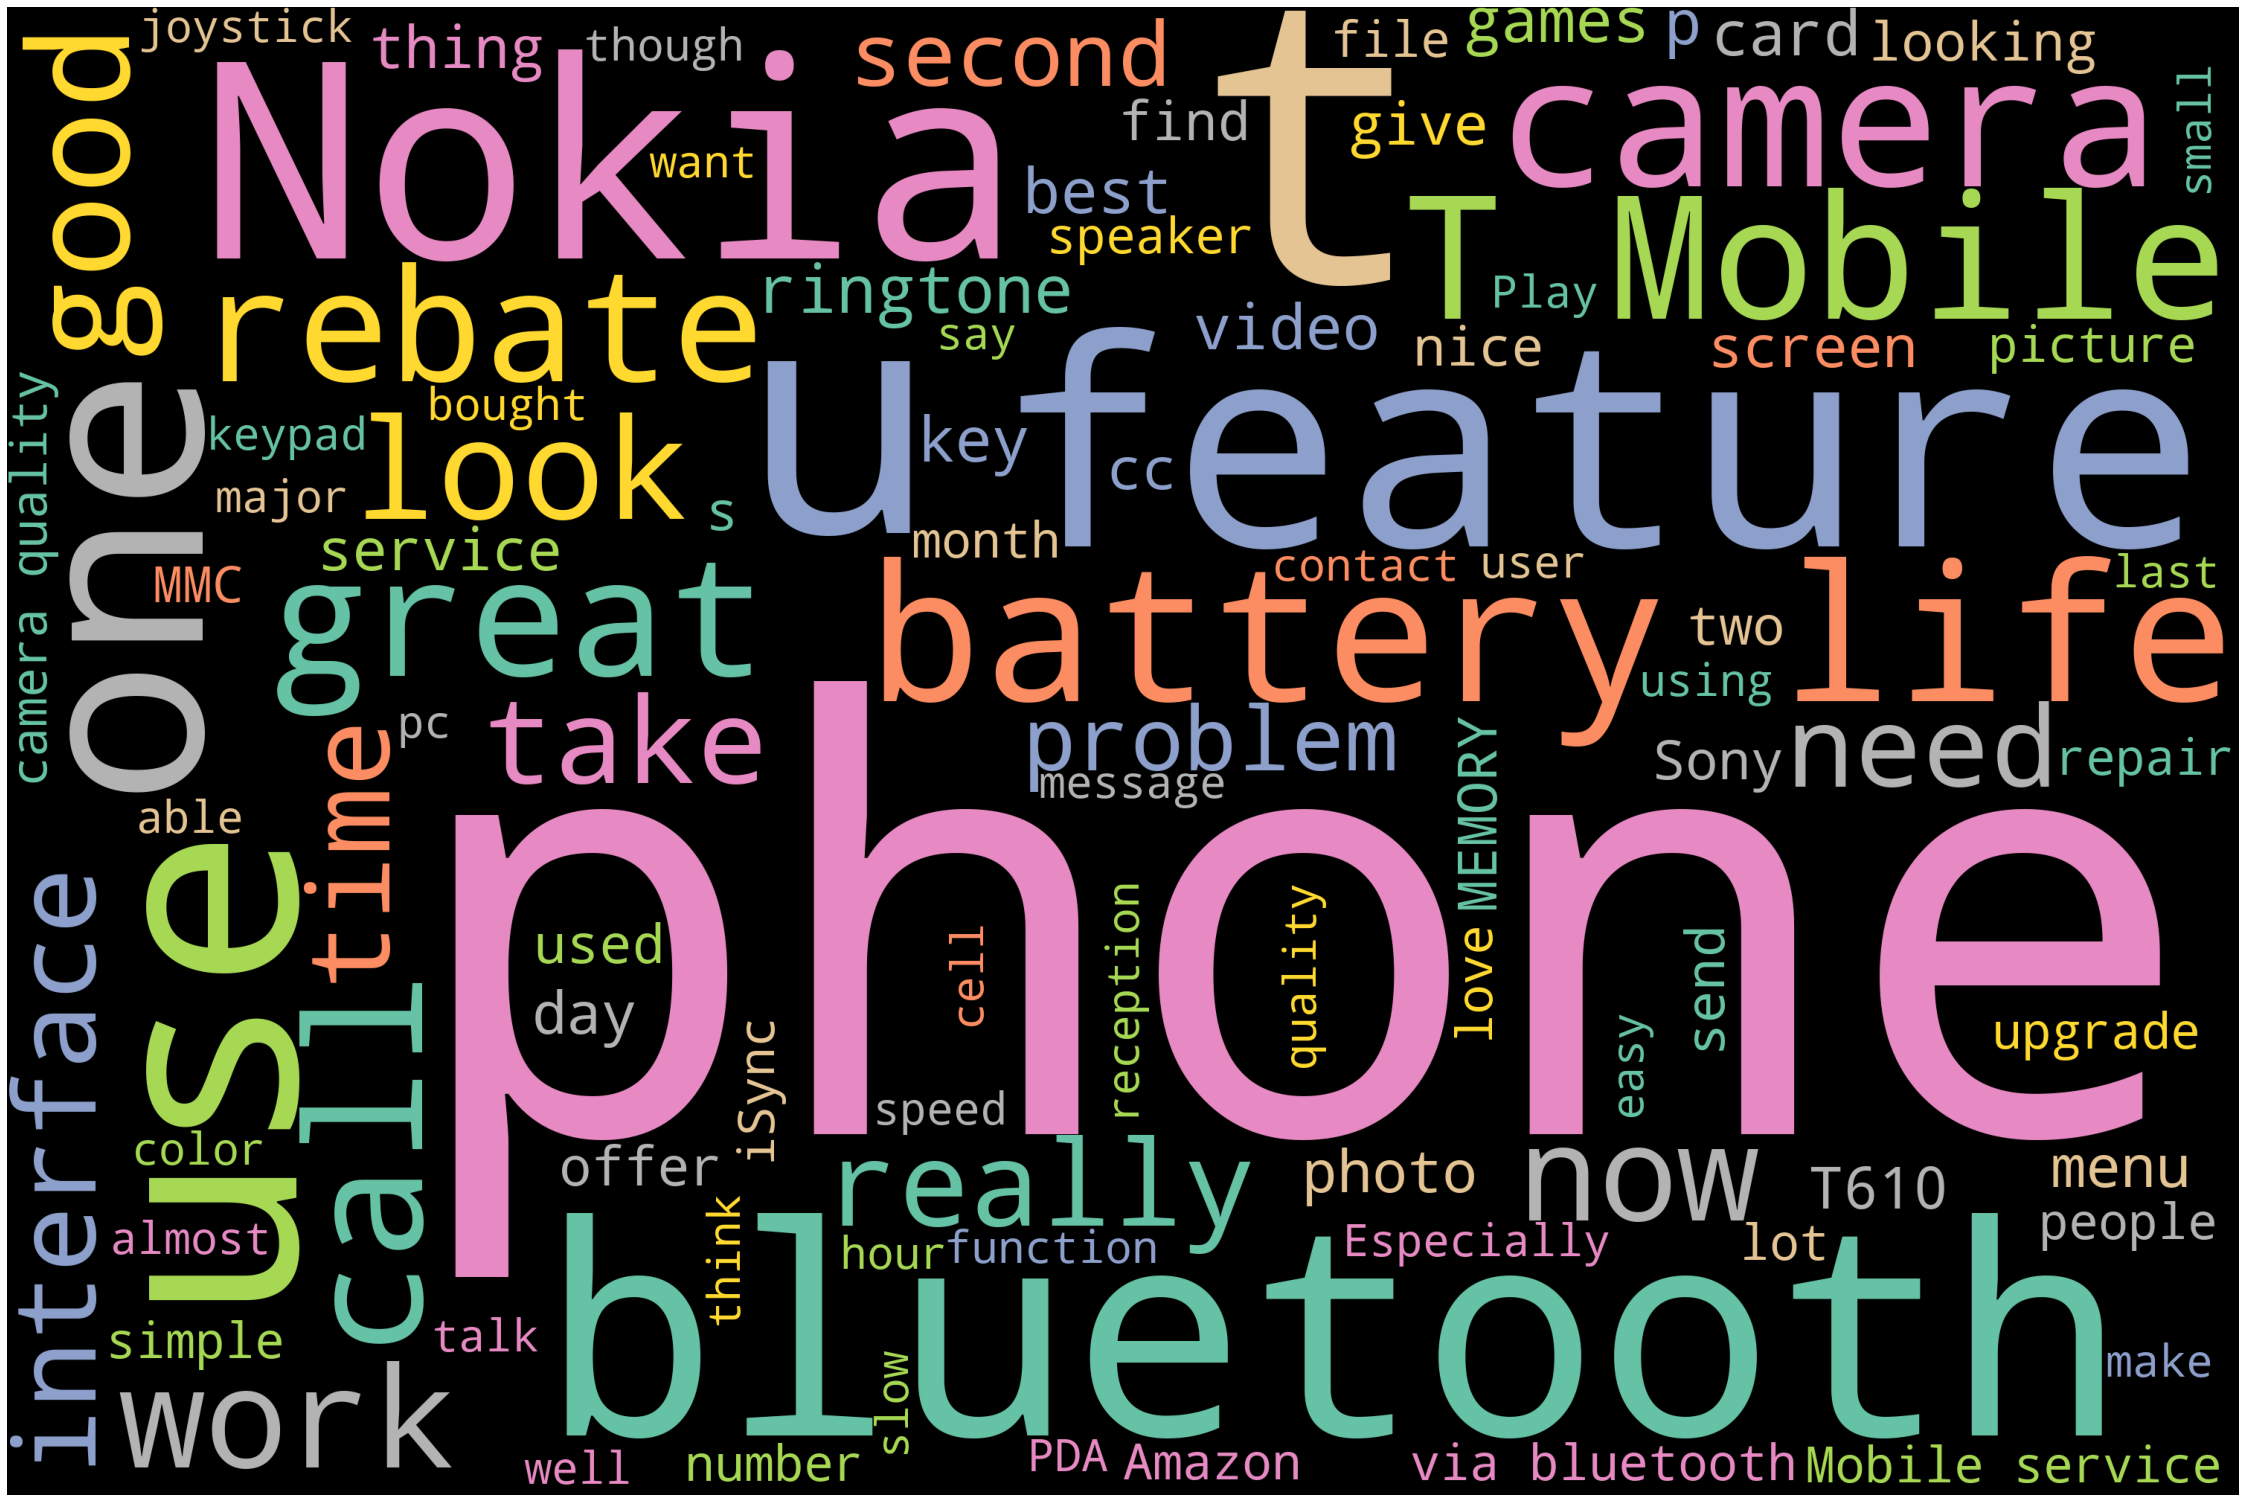

In [43]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)